## FIR HAMMING WINDOW

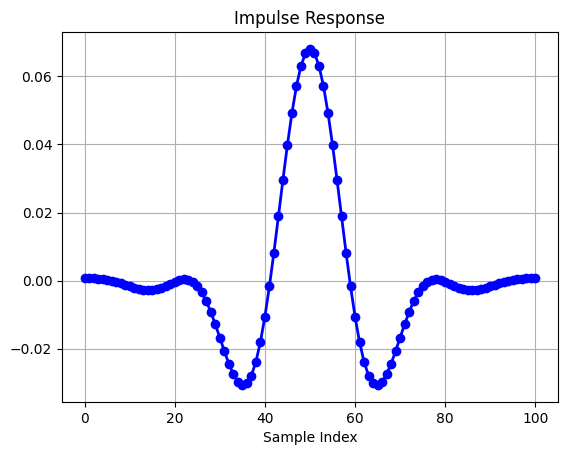

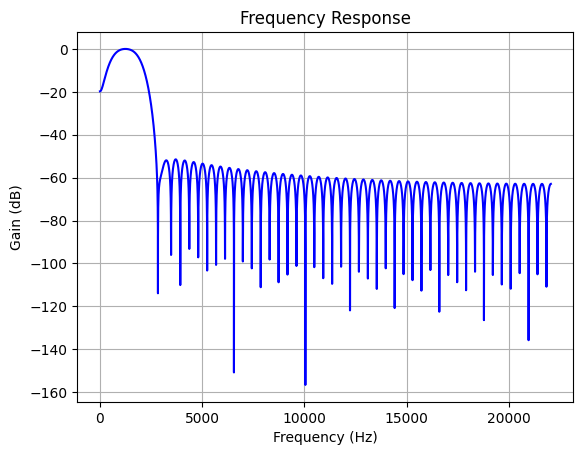

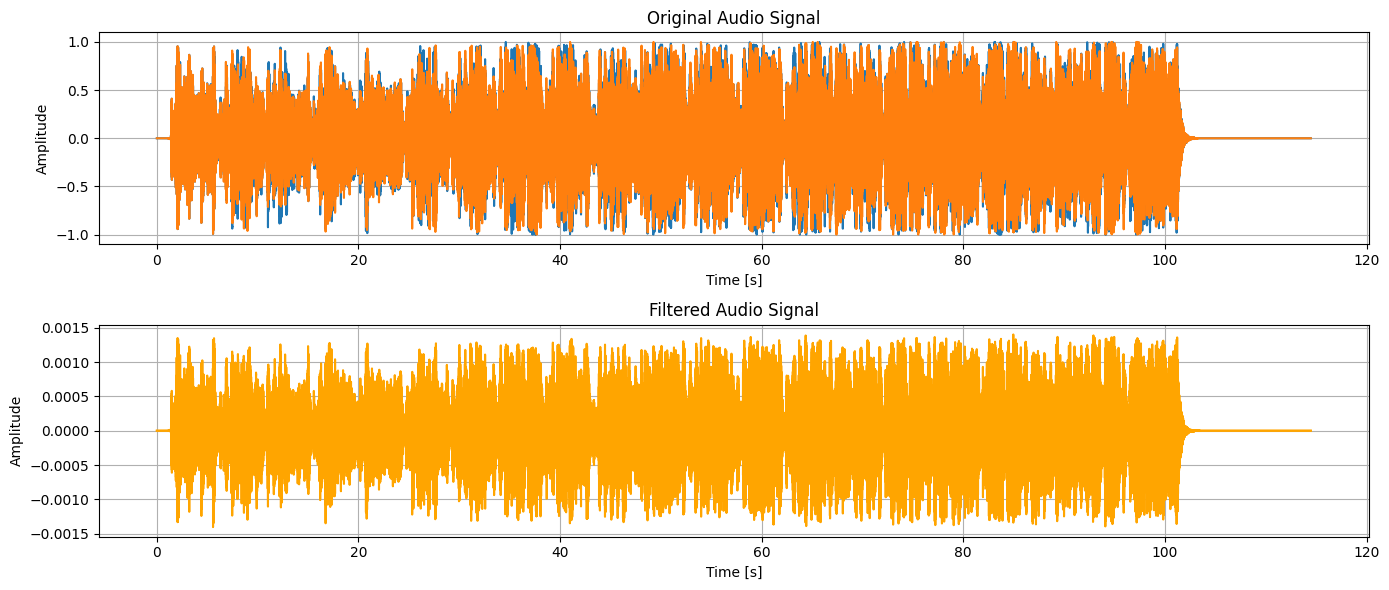

Passband Ripple: 156.61 dB
Stopband Attenuation: 59.89 dB
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Hamming.wav


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain FIR Band-Pass Filter menggunakan Hamming Window
def design_fir_bandpass(sample_rate, lowcut, highcut, numtaps):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    taps = firwin(numtaps, [low, high], pass_zero=False, window='hamming')
    return taps

# Memproses audio dengan FIR filter
def apply_fir_filter(data, taps):
    filtered_data = lfilter(taps, 1.0, data)
    return filtered_data

# Menampilkan impulse response dari filter
def plot_impulse_response(taps):
    plt.figure()
    plt.plot(taps, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menampilkan frequency response dari filter
def plot_frequency_response(taps, sample_rate):
    w, h = freqz(taps, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Hamming.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    numtaps = 101  # Jumlah tap pada FIR filter

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    taps = design_fir_bandpass(sample_rate, lowcut, highcut, numtaps)

    # Menampilkan impulse response
    plot_impulse_response(taps)

    # Menampilkan frequency response
    w, h = plot_frequency_response(taps, sample_rate)

    # Memproses audio
    filtered_data = apply_fir_filter(data, taps)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## FIR HANN WINDOW

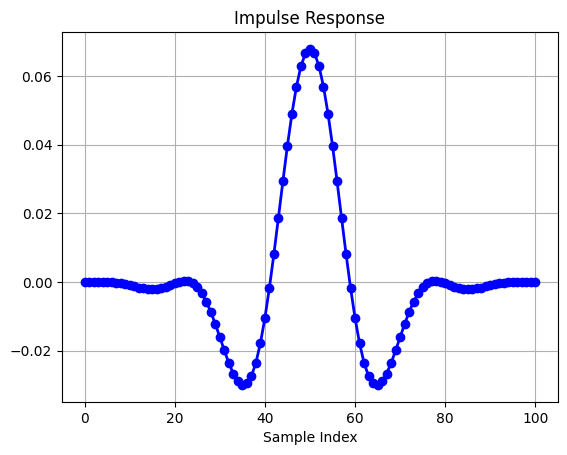

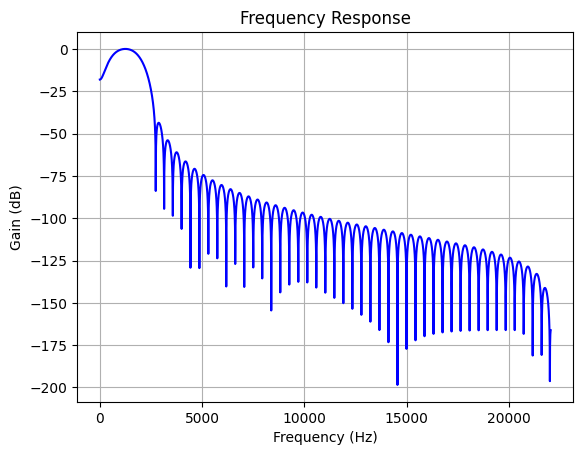

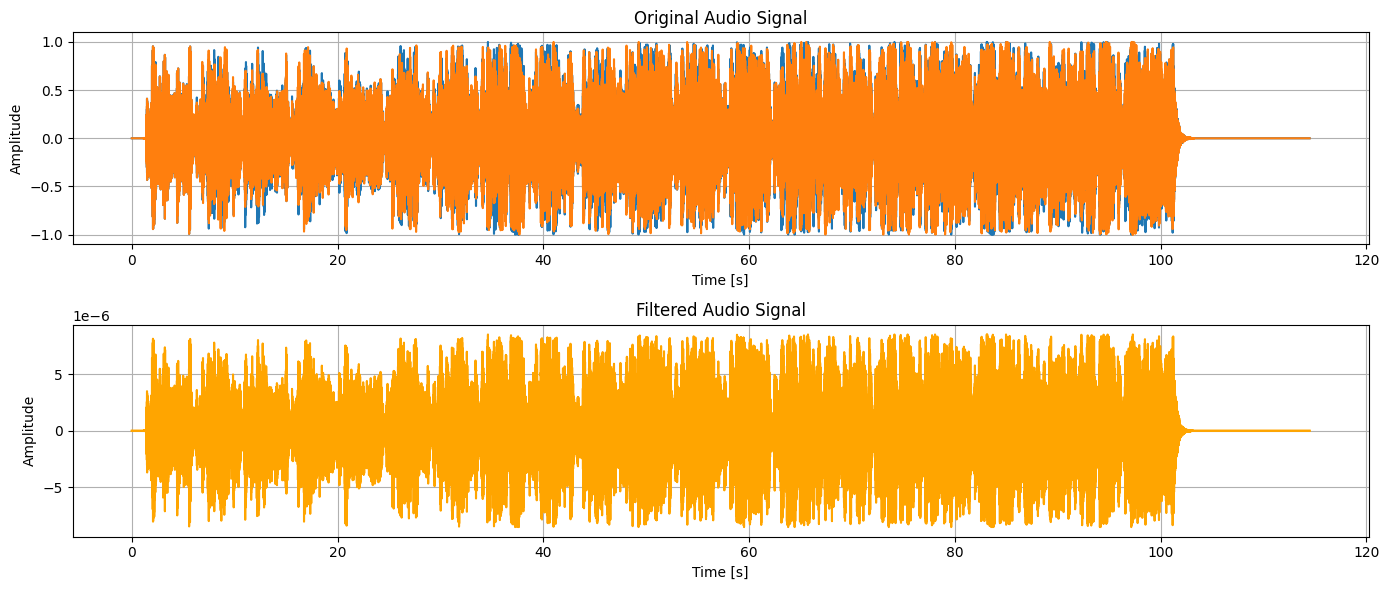

Passband Ripple: 198.49 dB
Stopband Attenuation: 100.40 dB
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Hann.wav


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain FIR Band-Pass Filter menggunakan Hann Window
def design_fir_bandpass(sample_rate, lowcut, highcut, numtaps):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    taps = firwin(numtaps, [low, high], pass_zero=False, window='hann')
    return taps

# Memproses audio dengan FIR filter
def apply_fir_filter(data, taps):
    filtered_data = lfilter(taps, 1.0, data)
    return filtered_data

# Menampilkan impulse response dari filter
def plot_impulse_response(taps):
    plt.figure()
    plt.plot(taps, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menampilkan frequency response dari filter
def plot_frequency_response(taps, sample_rate):
    w, h = freqz(taps, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Hann.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    numtaps = 101  # Jumlah tap pada FIR filter

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    taps = design_fir_bandpass(sample_rate, lowcut, highcut, numtaps)

    # Menampilkan impulse response
    plot_impulse_response(taps)

    # Menampilkan frequency response
    w, h = plot_frequency_response(taps, sample_rate)

    # Memproses audio
    filtered_data = apply_fir_filter(data, taps)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## FIR RECTANGLE WINDOW

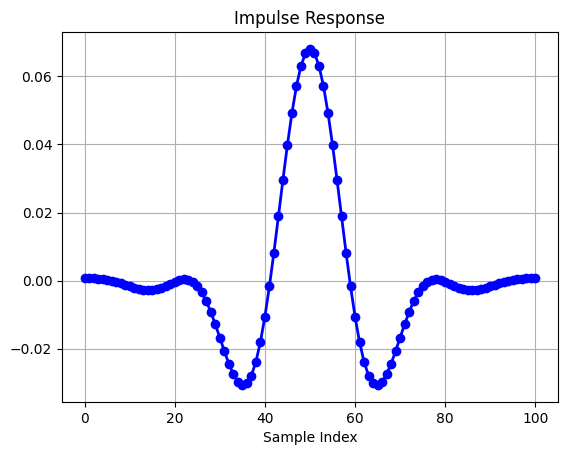

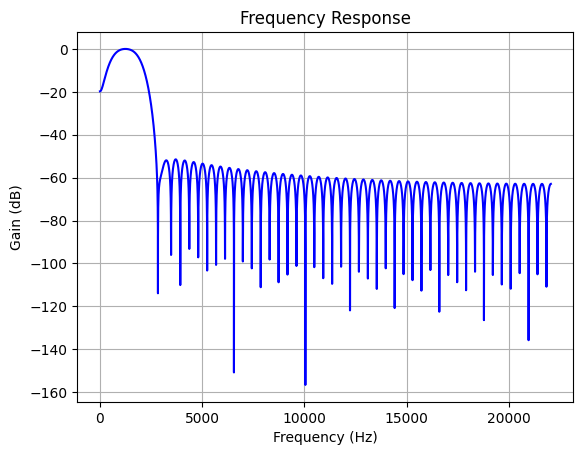

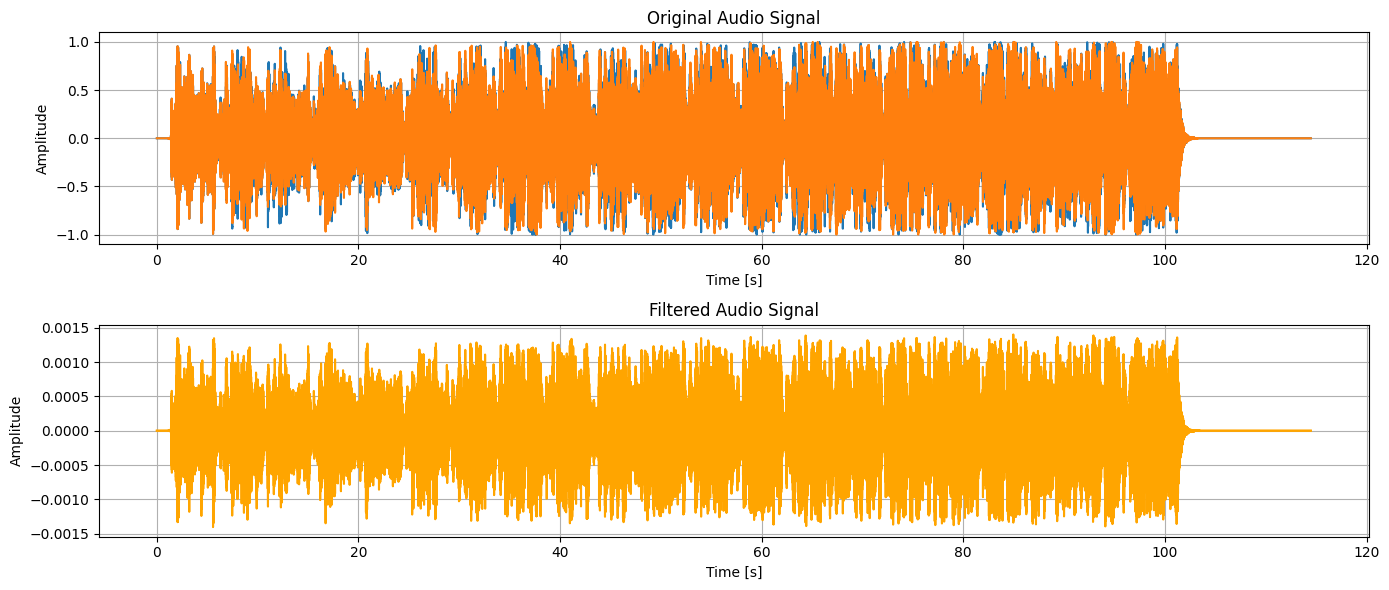

Passband Ripple: 156.61 dB
Stopband Attenuation: 59.89 dB
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Rectangular.wav


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain FIR Band-Pass Filter menggunakan Rectangular Window
def design_fir_bandpass(sample_rate, lowcut, highcut, numtaps):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    taps = firwin(numtaps, [low, high], pass_zero=False)
    return taps

# Memproses audio dengan FIR filter
def apply_fir_filter(data, taps):
    filtered_data = lfilter(taps, 1.0, data)
    return filtered_data

# Menampilkan impulse response dari filter
def plot_impulse_response(taps):
    plt.figure()
    plt.plot(taps, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menampilkan frequency response dari filter
def plot_frequency_response(taps, sample_rate):
    w, h = freqz(taps, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Rectangular.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    numtaps = 101  # Jumlah tap pada FIR filter

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    taps = design_fir_bandpass(sample_rate, lowcut, highcut, numtaps)

    # Menampilkan impulse response
    plot_impulse_response(taps)

    # Menampilkan frequency response
    w, h = plot_frequency_response(taps, sample_rate)

    # Memproses audio
    filtered_data = apply_fir_filter(data, taps)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## FIR KAISER WINDOW

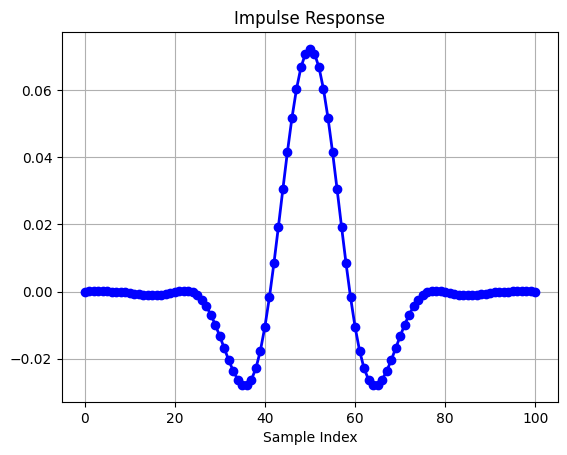

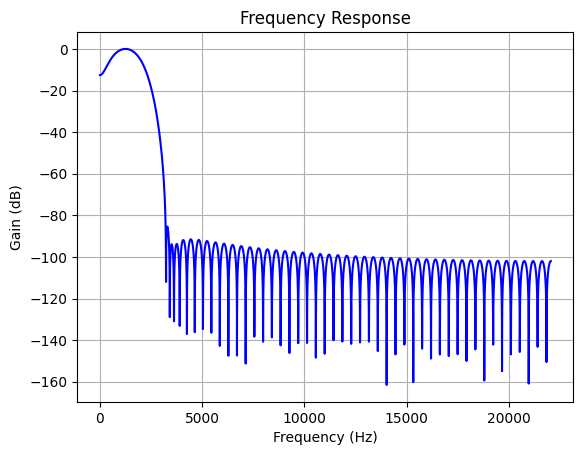

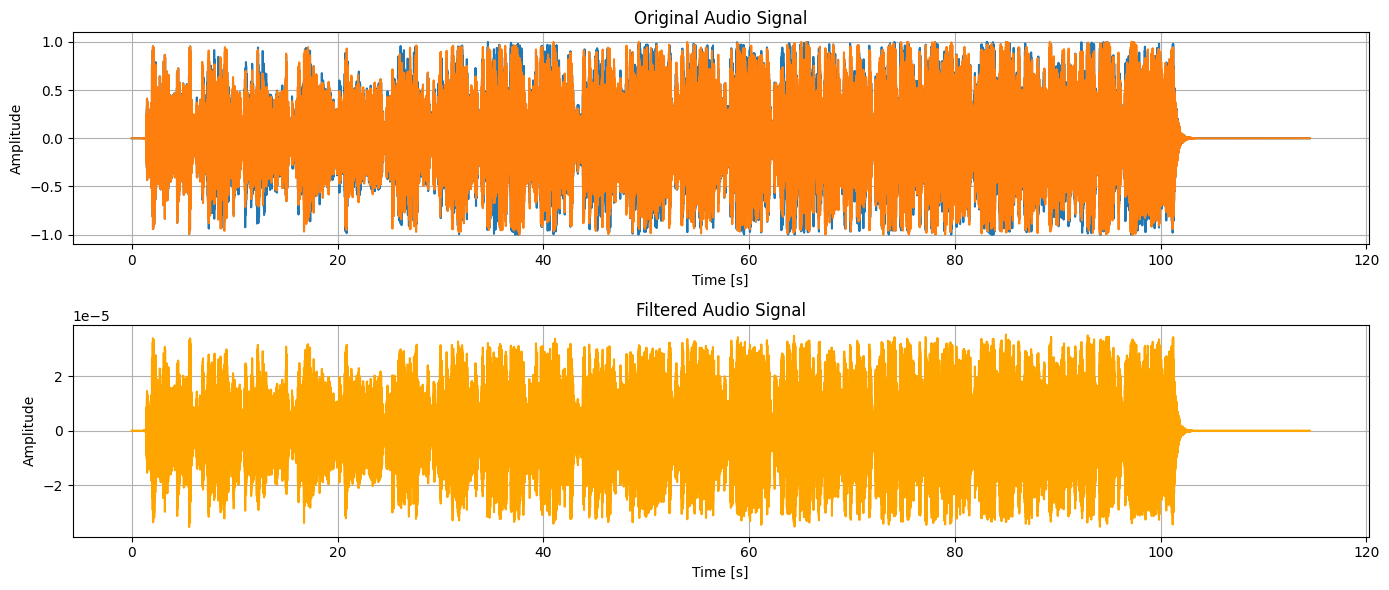

Passband Ripple: 161.55 dB
Stopband Attenuation: 98.88 dB
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Kaiser.wav


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz, kaiserord
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain FIR Band-Pass Filter menggunakan Kaiser Window
def design_fir_bandpass(sample_rate, lowcut, highcut, numtaps, beta):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    taps = firwin(numtaps, [low, high], pass_zero=False, window=('kaiser', beta))
    return taps

# Memproses audio dengan FIR filter
def apply_fir_filter(data, taps):
    filtered_data = lfilter(taps, 1.0, data)
    return filtered_data

# Menampilkan impulse response dari filter
def plot_impulse_response(taps):
    plt.figure()
    plt.plot(taps, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menampilkan frequency response dari filter
def plot_frequency_response(taps, sample_rate):
    w, h = freqz(taps, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Kaiser.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    numtaps = 101  # Jumlah tap pada FIR filter
    beta = 8.6  # Parameter beta untuk Kaiser window (nilai beta dapat disesuaikan sesuai kebutuhan)

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    taps = design_fir_bandpass(sample_rate, lowcut, highcut, numtaps, beta)

    # Menampilkan impulse response
    plot_impulse_response(taps)

    # Menampilkan frequency response
    w, h = plot_frequency_response(taps, sample_rate)

    # Memproses audio
    filtered_data = apply_fir_filter(data, taps)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## IIR CHEBYSHEV

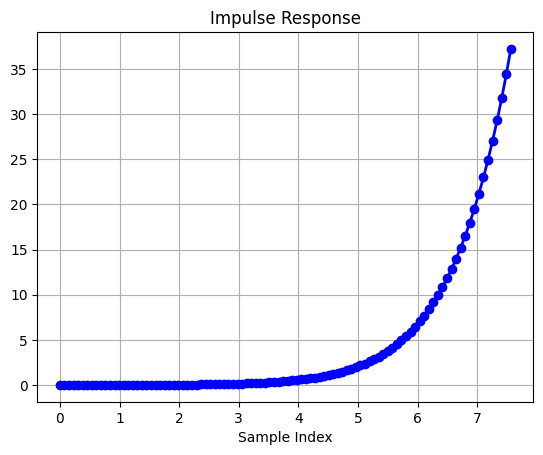

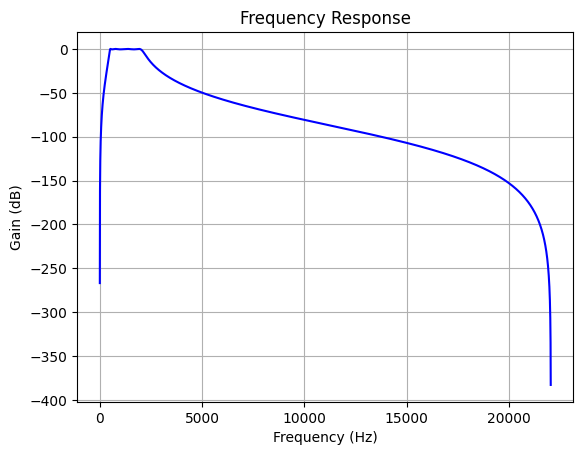

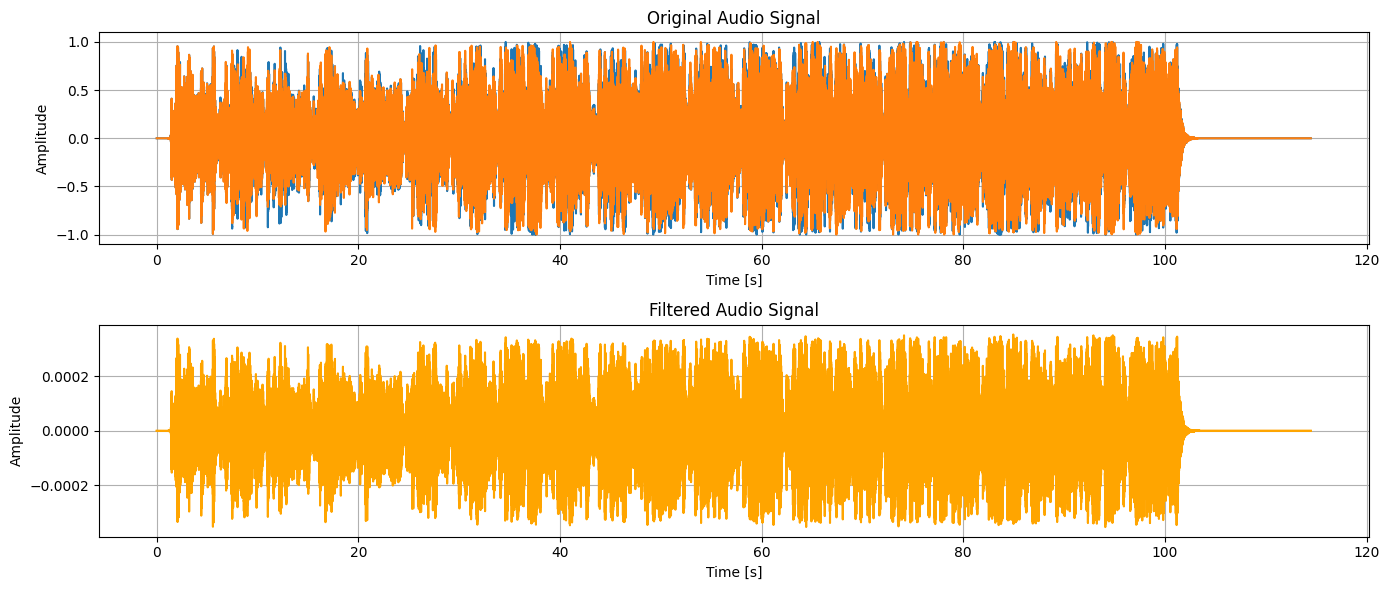

Passband Ripple: 382.88 dB
Stopband Attenuation: 86.03 dB
Cutoff Frequency: Not found
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Chebyshev.wav


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, lfilter, freqz, impulse
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain IIR Band-Pass Filter menggunakan Chebyshev Type I
def design_chebyshev_bandpass(sample_rate, lowcut, highcut, order, rp):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = cheby1(order, rp, [low, high], btype='band')
    return b, a

# Memproses audio dengan IIR filter
def apply_iir_filter(data, b, a):
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Menampilkan frequency response dari filter
def plot_frequency_response(b, a, sample_rate):
    w, h = freqz(b, a, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menampilkan impulse response dari filter
def plot_impulse_response(b, a):
    t, imp_resp = impulse((b, a))
    plt.figure()
    plt.plot(t, imp_resp, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')
    if cutoff_frequency:
        print(f'Cutoff Frequency: {cutoff_frequency:.2f} Hz')
    else:
        print('Cutoff Frequency: Not found')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Chebyshev.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    order = 4  # Orde dari IIR filter
    rp = 0.5  # Ripple passband dalam dB untuk Chebyshev Type I

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    b, a = design_chebyshev_bandpass(sample_rate, lowcut, highcut, order, rp)

    # Menampilkan impulse response
    plot_impulse_response(b, a)

    # Menampilkan frequency response
    w, h = plot_frequency_response(b, a, sample_rate)

    # Memproses audio
    filtered_data = apply_iir_filter(data, b, a)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## IIR BUTTERWORTH

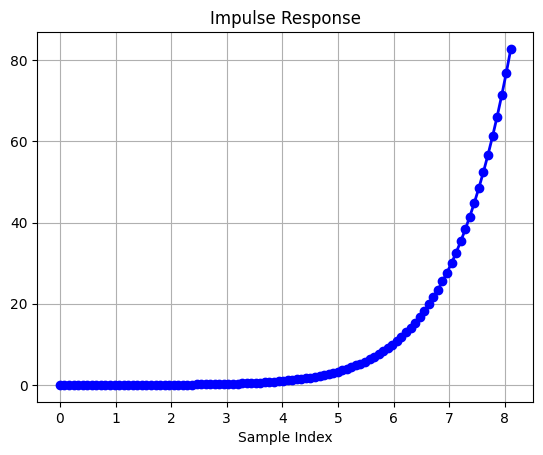

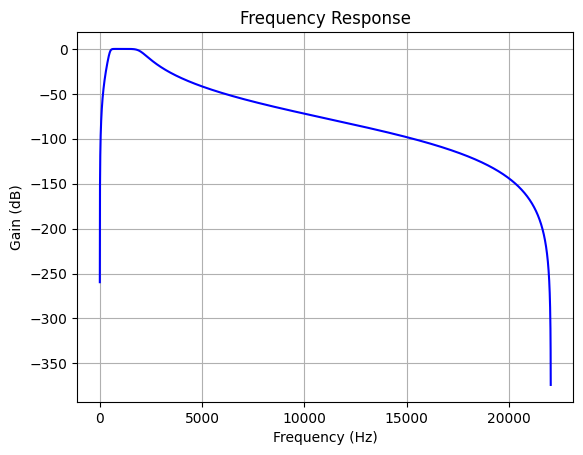

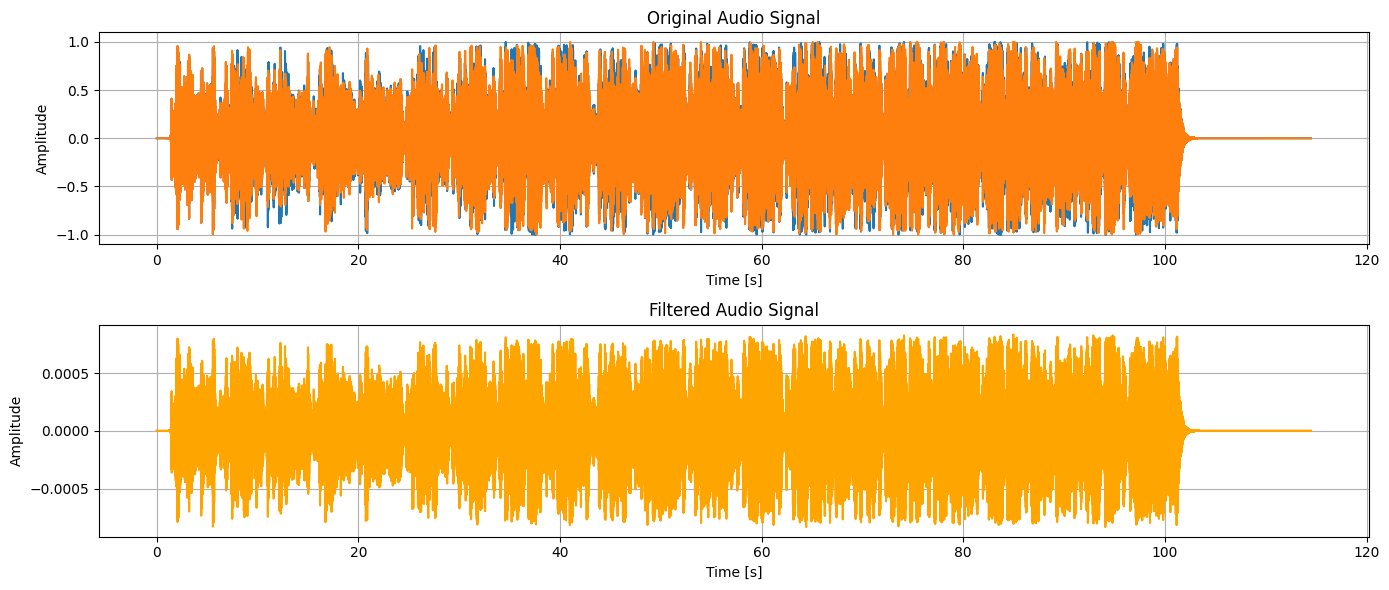

Passband Ripple: 373.92 dB
Stopband Attenuation: 77.21 dB
Cutoff Frequency: Not found
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Butterworth.wav


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, impulse
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain IIR Band-Pass Filter menggunakan Butterworth
def design_butterworth_bandpass(sample_rate, lowcut, highcut, order):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Memproses audio dengan IIR filter
def apply_iir_filter(data, b, a):
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Menampilkan frequency response dari filter
def plot_frequency_response(b, a, sample_rate):
    w, h = freqz(b, a, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menampilkan impulse response dari filter
def plot_impulse_response(b, a):
    t, imp_resp = impulse((b, a))
    plt.figure()
    plt.plot(t, imp_resp, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')
    if cutoff_frequency:
        print(f'Cutoff Frequency: {cutoff_frequency:.2f} Hz')
    else:
        print('Cutoff Frequency: Not found')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Butterworth.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    order = 4  # Orde dari IIR filter

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    b, a = design_butterworth_bandpass(sample_rate, lowcut, highcut, order)

    # Menampilkan impulse response
    plot_impulse_response(b, a)

    # Menampilkan frequency response
    w, h = plot_frequency_response(b, a, sample_rate)

    # Memproses audio
    filtered_data = apply_iir_filter(data, b, a)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## IIR ELLIPTIC

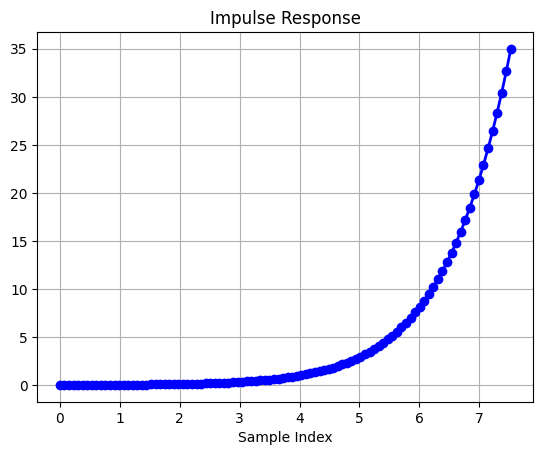

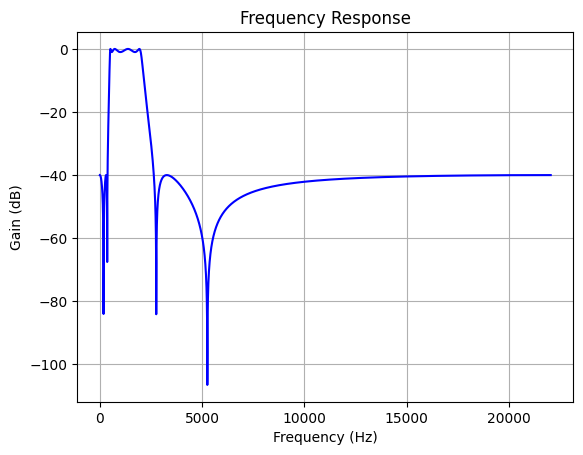

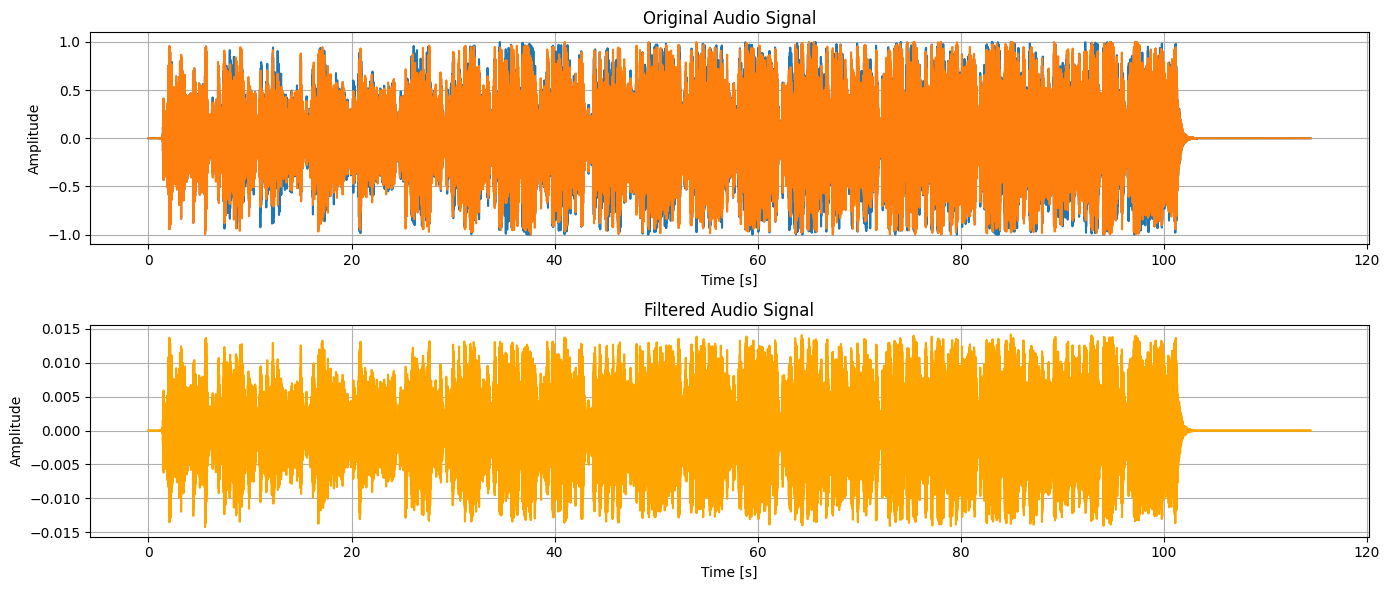

Passband Ripple: 106.52 dB
Stopband Attenuation: 40.00 dB
Cutoff Frequency: Not found
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Elliptic.wav


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ellip, lfilter, freqz, impulse
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain IIR Band-Pass Filter menggunakan Elliptic
def design_elliptic_bandpass(sample_rate, lowcut, highcut, order, rp, rs):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = ellip(order, rp, rs, [low, high], btype='band')
    return b, a

# Memproses audio dengan IIR filter
def apply_iir_filter(data, b, a):
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Menampilkan frequency response dari filter
def plot_frequency_response(b, a, sample_rate):
    w, h = freqz(b, a, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menampilkan impulse response dari filter
def plot_impulse_response(b, a):
    t, imp_resp = impulse((b, a))
    plt.figure()
    plt.plot(t, imp_resp, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')
    if cutoff_frequency:
        print(f'Cutoff Frequency: {cutoff_frequency:.2f} Hz')
    else:
        print('Cutoff Frequency: Not found')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Elliptic.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    order = 4  # Orde dari IIR filter

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    rp = 1  # Nilai contoh untuk ripples di band-pass
    rs = 40  # Nilai contoh untuk stopband attenuation
    b, a = design_elliptic_bandpass(sample_rate, lowcut, highcut, order, rp, rs)

    # Menampilkan impulse response
    plot_impulse_response(b, a)

    # Menampilkan frequency response
    w, h = plot_frequency_response(b, a, sample_rate)

    # Memproses audio
    filtered_data = apply_iir_filter(data, b, a)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()


## IIR BESSEL

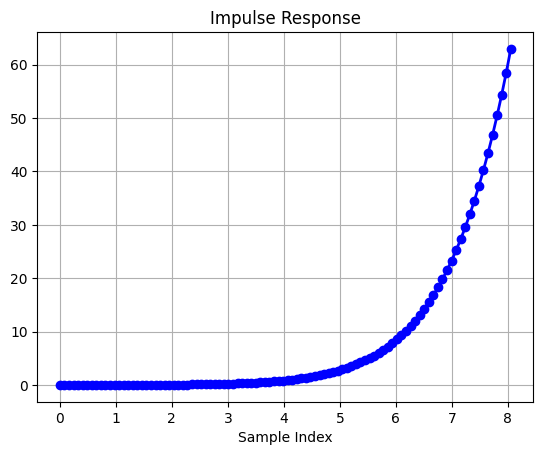

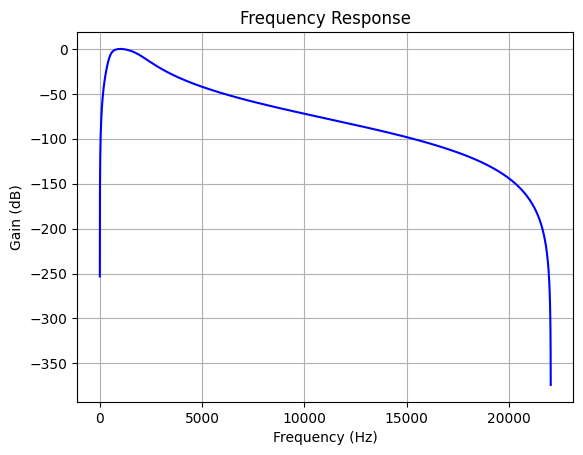

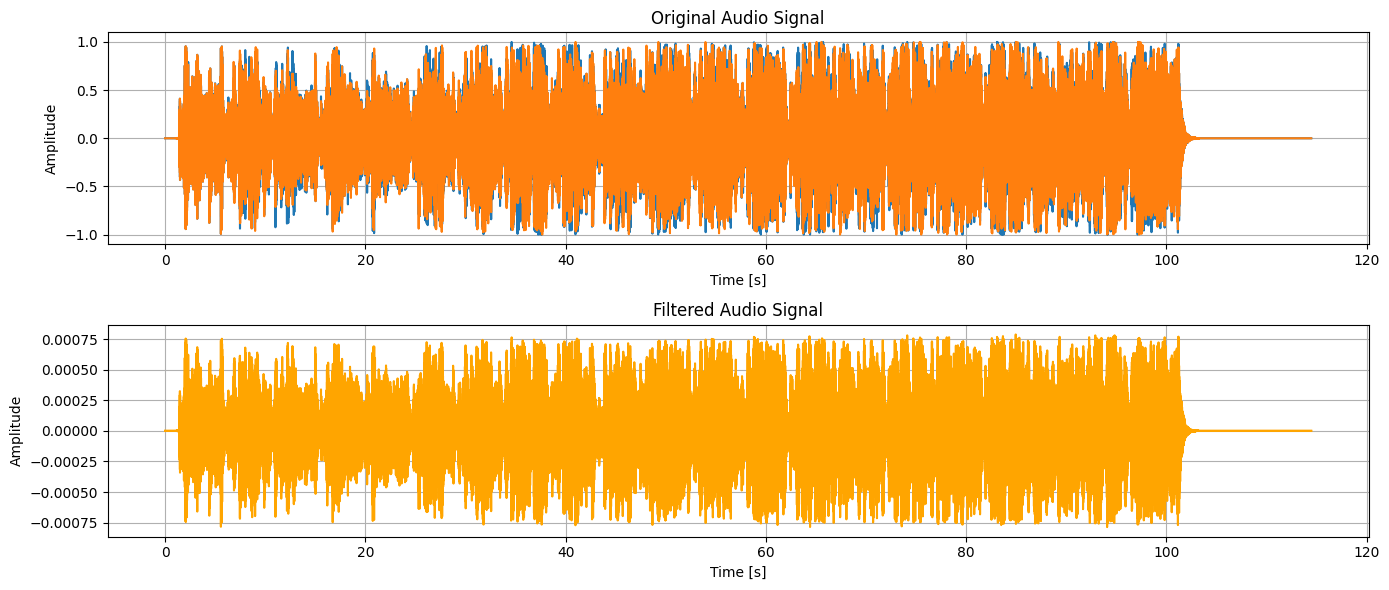

Passband Ripple: 373.93 dB
Stopband Attenuation: 77.26 dB
Cutoff Frequency: Not found
Filtered audio saved to C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Bessel.wav


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import bessel, lfilter, freqz, impulse
import soundfile as sf

# Membaca file audio
def read_audio(file_path):
    data, sample_rate = sf.read(file_path)
    return data, sample_rate

# Mendesain IIR Band-Pass Filter menggunakan Bessel
def design_bessel_bandpass(sample_rate, lowcut, highcut, order):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = bessel(order, [low, high], btype='band')
    return b, a

# Memproses audio dengan IIR filter
def apply_iir_filter(data, b, a):
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Menampilkan frequency response dari filter
def plot_frequency_response(b, a, sample_rate):
    w, h = freqz(b, a, worN=8000)
    plt.figure()
    plt.plot(0.5 * sample_rate * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
    plt.title('Frequency Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain (dB)')
    plt.grid()
    plt.show()

    return w, h

# Menampilkan impulse response dari filter
def plot_impulse_response(b, a):
    t, imp_resp = impulse((b, a))
    plt.figure()
    plt.plot(t, imp_resp, 'bo-', linewidth=2)
    plt.title('Impulse Response')
    plt.xlabel('Sample Index')
    plt.grid()
    plt.show()

# Menghitung karakteristik filter
def compute_filter_characteristics(w, h, sample_rate):
    magnitude = np.abs(h)
    db_magnitude = 20 * np.log10(magnitude)
    
    # Ripple di passband
    passband_ripple = np.max(db_magnitude) - np.min(db_magnitude)
    
    # Atenuasi di stopband
    stopband_attenuation = -np.max(db_magnitude[int(len(db_magnitude) / 2):])
    
    # Frekuensi cutoff (frekuensi di mana magnitude turun 3 dB dari maksimum)
    cutoff_indices = np.where(db_magnitude <= -3)[0]
    if len(cutoff_indices) > 0:
        cutoff_frequency = 0.5 * sample_rate * w[cutoff_indices[0]] / np.pi
    else:
        cutoff_frequency = None
    
    return passband_ripple, stopband_attenuation, cutoff_frequency

# Menampilkan karakteristik filter
def display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency):
    print(f'Passband Ripple: {passband_ripple:.2f} dB')
    print(f'Stopband Attenuation: {stopband_attenuation:.2f} dB')
    if cutoff_frequency:
        print(f'Cutoff Frequency: {cutoff_frequency:.2f} Hz')
    else:
        print('Cutoff Frequency: Not found')

# Menyimpan audio yang telah diproses
def save_audio(file_path, data, sample_rate):
    sf.write(file_path, data, sample_rate)

# Menampilkan sinyal audio asli dan hasil filter
def plot_audio_signals(original_data, filtered_data, sample_rate):
    time = np.arange(len(original_data)) / sample_rate

    plt.figure(figsize=(14, 6))
    
    # Plot sinyal asli
    plt.subplot(2, 1, 1)
    plt.plot(time, original_data, label='Original Signal')
    plt.title('Original Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    # Plot sinyal hasil filter
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_data, label='Filtered Signal', color='orange')
    plt.title('Filtered Audio Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.tight_layout()
    plt.show()

def main():
    input_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\Indo.wav'  # Ganti dengan path file audio yang ingin diproses
    output_file = r'C:\Users\hassa\ドキュメント\Perkuliahan\PSD Window\BandPass-Bessel.wav'  # Ganti dengan path file audio output yang diinginkan
    lowcut = 500.0  # Frekuensi batas bawah band-pass filter
    highcut = 2000.0  # Frekuensi batas atas band-pass filter
    order = 4  # Orde dari IIR filter

    # Membaca audio
    data, sample_rate = read_audio(input_file)

    # Mendesain filter
    b, a = design_bessel_bandpass(sample_rate, lowcut, highcut, order)

    # Menampilkan impulse response
    plot_impulse_response(b, a)

    # Menampilkan frequency response
    w, h = plot_frequency_response(b, a, sample_rate)

    # Memproses audio
    filtered_data = apply_iir_filter(data, b, a)

    # Menampilkan sinyal audio asli dan hasil filter
    plot_audio_signals(data, filtered_data, sample_rate)

    # Menghitung karakteristik filter
    passband_ripple, stopband_attenuation, cutoff_frequency = compute_filter_characteristics(w, h, sample_rate)

    # Menampilkan karakteristik filter
    display_filter_characteristics(passband_ripple, stopband_attenuation, cutoff_frequency)

    # Menyimpan hasil audio yang telah diproses
    save_audio(output_file, filtered_data, sample_rate)
    print(f'Filtered audio saved to {output_file}')

if __name__ == '__main__':
    main()
